In [2]:
import numpy as np
import pandas as pd
from sklearn import tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Movie_regression.csv", header=0)
data.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Issues
## ->Time_taken predictor has na values.
## ->2 Object type predictors

In [5]:
time_mean = data['Time_taken'].mean()
data['Time_taken'].fillna(value=(time_mean), inplace=True)

In [6]:
data = pd.get_dummies(data, columns=['3D_available', 'Genre'], drop_first=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [8]:
corr_data = data.corr()
corr_data.sort_values(by = 'Collection', ascending=False, inplace=True)
corr_data['Collection']

Collection             1.000000
Trailer_views          0.720119
Budget                 0.696304
Multiplex coverage     0.429300
Critic_rating          0.341288
3D_available_YES       0.182867
Time_taken             0.110005
Genre_Thriller         0.071751
Genre_Drama            0.036233
Twitter_hastags        0.023122
Avg_age_actors        -0.047426
Genre_Comedy          -0.077478
Director_rating       -0.246650
Producer_rating       -0.248200
Lead_Actress_rating   -0.249459
Lead_ Actor_Rating    -0.251355
Movie_length          -0.377999
Marketing expense     -0.389582
Num_multiplex         -0.391729
Production expense    -0.484754
Name: Collection, dtype: float64

In [9]:
data.describe(include='all')

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.551383,0.306324,0.191700,0.361660
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,30.921101,104.779133,12.513697,106.332889,18364.351764,0.497845,0.461422,0.394028,0.480957
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.690000,223.796000,28.000000,465.000000,34050.000000,0.000000,0.000000,0.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,158.980000,254.400000,39.000000,535.500000,42400.000000,1.000000,0.000000,0.000000,0.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,50000.000000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
X_data = data.drop(columns='Collection')
Y_data = data['Collection']
X_train, X_test, Y_train, Y_actual = train_test_split(X_data, Y_data, test_size=0.2, random_state=None)

In [11]:
lin_reg = linear_model.LinearRegression()
regtree_3 = tree.DecisionTreeRegressor(max_depth=3)
regtree_5 = tree.DecisionTreeRegressor(max_depth=5)

In [12]:
regtree_3.fit(X_train, Y_train)
regtree_5.fit(X_train, Y_train)
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [13]:
Y_tree_3 = regtree_3.predict(X_test)
Y_tree_5 = regtree_5.predict(X_test)
Y_lin = lin_reg.predict(X_test)

In [14]:
print("Error_tree for depth 3 is:", mean_squared_error(Y_actual, Y_tree_3))
print("Error_tree for depth 5 is:", mean_squared_error(Y_actual, Y_tree_5))
print("Error_lin is:", mean_squared_error(Y_actual, Y_lin))

Error_tree for depth 3 is: 81664850.67676634
Error_tree for depth 5 is: 73824137.88569629
Error_lin is: 115812082.6397297


In [15]:
print("r2_score of tree(depth 3) is:", r2_score(Y_actual, Y_tree_3))
print("r2_score of tree(depth 5) is:", r2_score(Y_actual, Y_tree_5))
print("r2_score of linear model is:", r2_score(Y_actual, Y_lin)) 

r2_score of tree(depth 3) is: 0.8028191975908742
r2_score of tree(depth 5) is: 0.821750696599205
r2_score of linear model is: 0.7203702793266638


# Tree

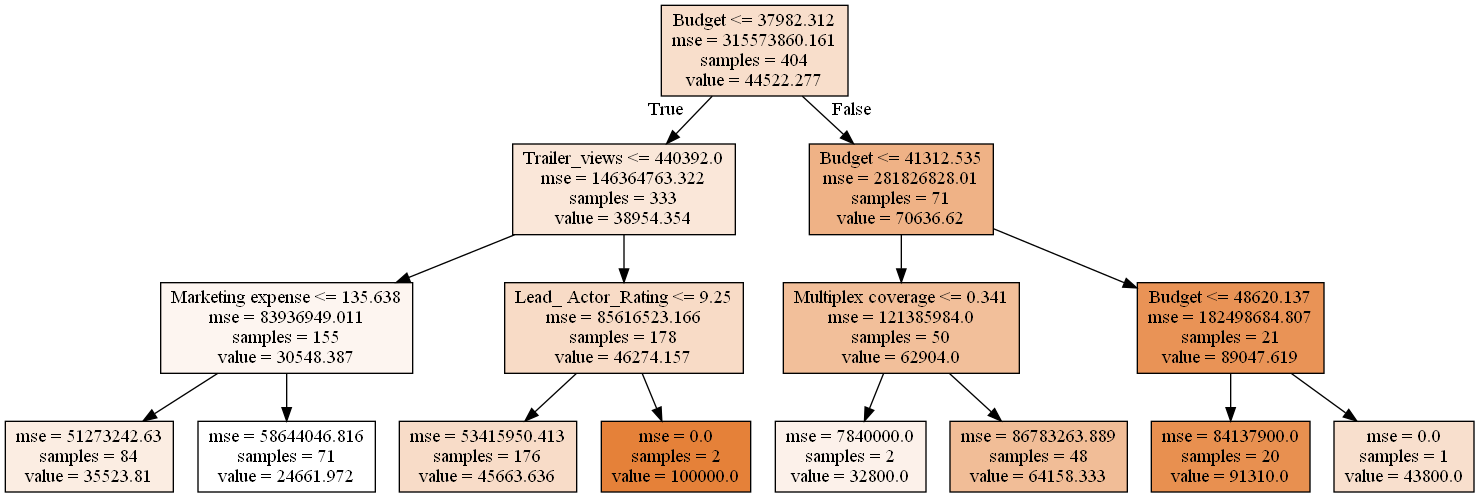

In [16]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(regtree_3, out_file = None, feature_names=X_train.columns, filled=True)
graph_3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph_3.create_png())